# Source of The Dataset
* Own dataset

In [1]:
# loadin important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# read the dataset 

df = pd.read_excel('depression.xlsx')
df.columns = [c.strip() for c in df.columns]
df.columns = [c.lower().replace(' ', '_') for c in df.columns]
print(df.shape)
df.head()

(761, 34)


,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,exercise,meditation,video_games,study_hours,phone_hours,medication,movies_per_week,music_hours,depression,category
0,Tensed,24.0,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,Not at all,Not at all,Not at all,2,6 to 8,No,0,0,18,Moderate
1,Tensed,23.0,Male,Engineering,11,3,With family,None,Ambivert,Single,...,Regularly,Sometimes,Sometimes,4,0 to 2,No,5,0,1,None
2,Sad,19.0,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,Sometimes,Not at all,Not at all,3,6 to 8,No,0,0,21,Severe
3,Lost,23.0,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,Not at all,Not at all,Very often,1,0 to 2,No,5,0,23,Severe
4,Lost,22.0,Male,Engineering,11,1,With family,None,Ambivert,Single,...,Sometimes,Not at all,Very often,2,6 to 8,No,1,4,19,Moderate


In [3]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  mood  has  5  unique values ---->  ['Tensed' 'Sad' 'Lost' 'Happy' 'Angry']
Feature  age  has  17  unique values
Feature  gender  has  3  unique values ---->  ['Female' 'Male' 'Others']
Feature  subject  has  70  unique values
Feature  semester  has  22  unique values
Feature  sibilings  has  13  unique values
Feature  living  has  2  unique values ---->  ['With family' 'Without family']
Feature  employment  has  3  unique values ---->  ['Part time' 'None' 'Full time']
Feature  personality  has  3  unique values ---->  ['Extrovert' 'Ambivert' 'Introvert']
Feature  relationship  has  5  unique values ---->  ['In a relationship' 'Single' 'Engaged' 'Married' 'Divorced']
Feature  wakeup  has  76  unique values
Feature  breakfast  has  71  unique values
Feature  lunch  has  58  unique values
Feature  dinner  has  63  unique values
Feature  sleep  has  65  unique values
Feature  hobbies  has  187  unique values
Feature  smoker  has  2  unique values ---->  ['No' 'Yes']
Feature  alcoh

# Data Visualization

<AxesSubplot:xlabel='gender', ylabel='depression'>

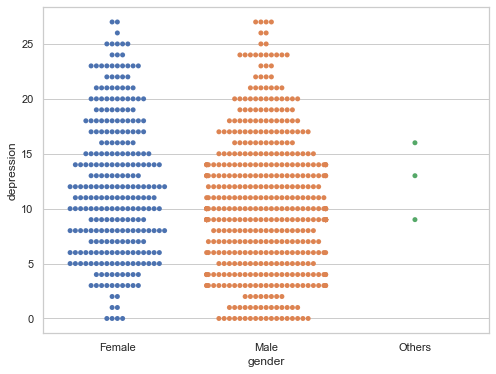

In [4]:
plt.rcParams["figure.figsize"] = (8, 6)
sns.set_theme(style="whitegrid")
sns.swarmplot(y = 'depression', x = 'gender', data = df)

<AxesSubplot:xlabel='depression', ylabel='Proportion'>

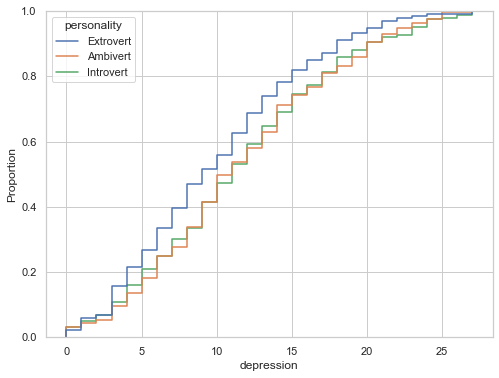

In [5]:
sns.ecdfplot(x = 'depression', data = df, hue = 'personality')

<AxesSubplot:xlabel='depression', ylabel='Count'>

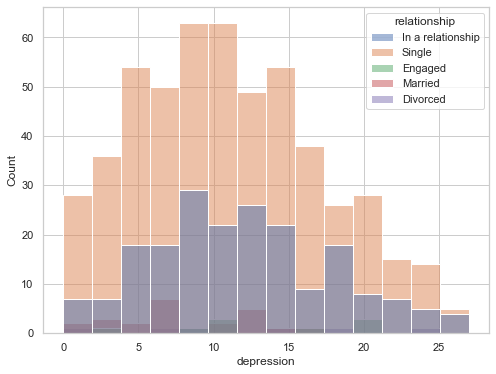

In [6]:
sns.histplot(x = 'depression', data = df, hue = 'relationship')

In [7]:
import collections

a = df['category']
counter = collections.Counter(a)
print(counter)
values = counter.values()
print(values)
keys = counter.keys()
print(keys)
print(counter.most_common(3))
print(dict(counter))

Counter({'Moderate': 549, 'None': 122, 'Severe': 90})
dict_values([549, 122, 90])
dict_keys(['Moderate', 'None', 'Severe'])
[('Moderate', 549), ('None', 122), ('Severe', 90)]
{'Moderate': 549, 'None': 122, 'Severe': 90}


([<matplotlib.patches.Wedge at 0x15f7b6acd60>,
 [Text(-0.7049381968551185, 0.8444300673321945, 'Moderate'),
  Text(0.3502668093861374, -1.0427430950346568, 'None'),
  Text(1.0249454946635685, -0.3993579008469133, 'Severe')],
 [Text(-0.3845117437391555, 0.4605982185448333, '72.1%'),
  Text(0.19105462330152947, -0.5687689609279946, '16.0%'),
  Text(0.5590611789074009, -0.2178315822801345, '11.8%')])

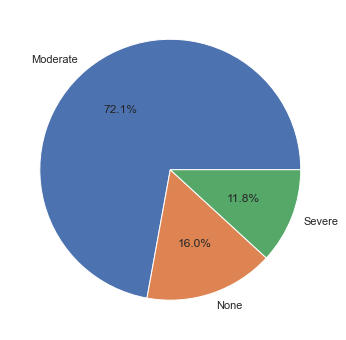

In [8]:
plt.pie(values, labels=keys, autopct='%1.1f%%')

# Data Pre-Processing Phase

In [9]:
# hobbies has so many noise and depression was column was just for visualization
df = df.drop(columns = ['hobbies', 'depression'])

# checing for null values

df.isnull().sum()

mood               0
age                0
gender             0
subject            0
semester           0
sibilings          0
living             0
employment         0
personality        0
relationship       0
wakeup             0
breakfast          0
lunch              0
dinner             0
sleep              0
smoker             0
alcoholic          0
drug_addicted      0
friends            0
hangout            0
social_events      0
pray               0
sports             0
exercise           0
meditation         0
video_games        0
study_hours        0
phone_hours        0
medication         2
movies_per_week    0
music_hours        0
category           0
dtype: int64

In [10]:
# remove null and uplicate entries

df.dropna(inplace = True)

# remove duplicate entries, if any

df.drop_duplicates(inplace = True)

print(df.shape)
df.describe()

(758, 32)


,age,semester,sibilings,study_hours,music_hours
count,758.000000,758.000000,758.000000,758.000000,758.000000
mean,22.548153,7.960422,1.748021,2.791557,1.725594
std,2.004451,4.803512,1.418351,2.199155,1.870625
min,17.000000,1.000000,0.000000,0.000000,0.000000
25%,21.000000,5.000000,1.000000,1.000000,1.000000
50%,22.000000,8.000000,1.000000,2.000000,1.000000
75%,24.000000,11.000000,2.000000,4.000000,2.000000
max,33.000000,83.000000,20.000000,10.000000,10.000000


In [11]:
# observe dataset

for cols in df.columns:
    print(str(df[cols].value_counts()) + '\n')

Happy     287
Tensed    186
Lost      157
Sad       108
Angry      20
Name: mood, dtype: int64

22.0    146
23.0    143
21.0    132
24.0    115
25.0     82
20.0     73
19.0     21
26.0     17
18.0     10
27.0      6
28.0      3
29.0      3
33.0      2
30.0      2
31.0      1
17.0      1
20.5      1
Name: age, dtype: int64

Male      475
Female    280
Others      3
Name: gender, dtype: int64

Engineering                                  384
Business                                     207
Pharmacy                                      28
MBBS                                          16
Law                                           15
                                            ... 
Honours                                        1
Interior Architecture                          1
College                                        1
Child development and social relationship      1
Not admitted yet                               1
Name: subject, Length: 70, dtype: int64

5     108
11     95
12   

In [12]:
# Convert Catergorical values to numeric representation

df['smoker'].replace({'No':0, 'Yes':1}, inplace = True)
df['alcoholic'].replace({'No':0, 'Yes':1}, inplace = True)
df['medication'].replace({'No':0, 'Yes':1}, inplace = True)
df['drug_addicted'].replace({'No':0, 'Yes':1}, inplace = True)
df['pray'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['sports'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['hangout'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)
df['phone_hours'].replace({'0 to 2': 0, '3 to 5': 1, '6 to 8':2, 'more than 8':3}, inplace = True)
df['exercise'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['meditation'].replace({'Not at all':0, 'Sometimes':1, 'Regularly':2}, inplace = True)
df['video_games'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very often':3}, inplace = True)
df['social_events'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)

# df['employment'].replace({'None':0, 'Part time':1, 'Full time': 2}, inplace = True)

df.head()

,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,sports,exercise,meditation,video_games,study_hours,phone_hours,medication,movies_per_week,music_hours,category
0,Tensed,24.0,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,0,0,0,0,2,2,0,0,0,Moderate
1,Tensed,23.0,Male,Engineering,11,3,With family,None,Ambivert,Single,...,1,2,1,1,4,0,0,5,0,None
2,Sad,19.0,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,0,1,0,0,3,2,0,0,0,Severe
3,Lost,23.0,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,0,0,0,3,1,0,0,5,0,Severe
4,Lost,22.0,Male,Engineering,11,1,With family,None,Ambivert,Single,...,1,1,0,3,2,2,0,1,4,Moderate


In [13]:
# Splitting hobbies in multiple cells

# df['hobbies'] = df['hobbies'].str.lower()
# df['hobbies'] = df['hobbies'].str.strip()
# df['hobbies'] = df['hobbies'].str.replace(', ', ',')
# df['hobbies'] = df['hobbies'].str.replace(' , ', ',')
# df['hobbies'] = df['hobbies'].str.replace(' ,', ',')

# for idx, row in df.iterrows():
#     for hobby in row.hobbies.split(","):
#         df.loc[idx, hobby] = 1

# df.fillna(0, inplace=True)
# df = df.drop(columns = ['hobbies'])
# df.columns = [c.strip() for c in df.columns]
# df.columns = [c.lower().replace(' ', '_') for c in df.columns]

df = df[df['movies_per_week'].astype(str).str.isdigit()]

print(df.shape)
df.head()

(750, 32)


,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,sports,exercise,meditation,video_games,study_hours,phone_hours,medication,movies_per_week,music_hours,category
0,Tensed,24.0,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,0,0,0,0,2,2,0,0,0,Moderate
1,Tensed,23.0,Male,Engineering,11,3,With family,None,Ambivert,Single,...,1,2,1,1,4,0,0,5,0,None
2,Sad,19.0,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,0,1,0,0,3,2,0,0,0,Severe
3,Lost,23.0,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,0,0,0,3,1,0,0,5,0,Severe
4,Lost,22.0,Male,Engineering,11,1,With family,None,Ambivert,Single,...,1,1,0,3,2,2,0,1,4,Moderate


<AxesSubplot:xlabel='category', ylabel='age'>

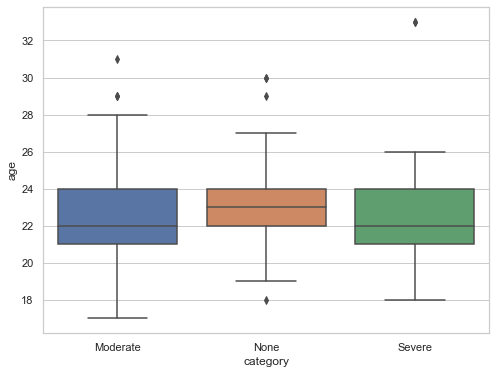

In [14]:
sns.boxplot(x='category', y='age', data=df)

<AxesSubplot:xlabel='category', ylabel='semester'>

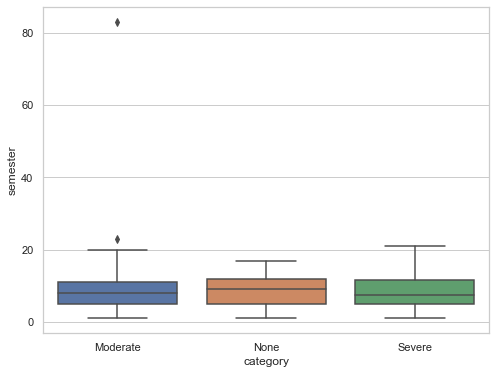

In [15]:
sns.boxplot(x='category', y='semester', data=df)

<AxesSubplot:xlabel='category', ylabel='friends'>

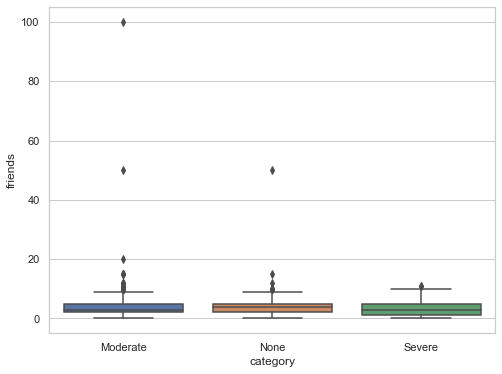

In [16]:
sns.boxplot(x='category', y='friends', data=df)

In [17]:
# settin limits for features

limit = {
    'age': 28,
    'semester': 20,
    'friends': 9,
}

# drop rows where limit exceed for features

for feature in limit:
    index = df.index[df[feature] > limit[feature]].tolist()
    df.drop(index = index, inplace = True)

print(df.shape)

# observe again

for cols in df.columns:
    print(str(df[cols].value_counts()) + '\n')

(698, 32)
Happy     253
Tensed    175
Lost      150
Sad       101
Angry      19
Name: mood, dtype: int64

23.0    135
22.0    133
21.0    127
24.0    106
25.0     74
20.0     68
19.0     21
26.0     15
18.0      8
27.0      6
28.0      3
17.0      1
20.5      1
Name: age, dtype: int64

Male      428
Female    268
Others      2
Name: gender, dtype: int64

Engineering                                  351
Business                                     192
Pharmacy                                      26
MBBS                                          14
Law                                           14
                                            ... 
Honours                                        1
Interior Architecture                          1
College                                        1
Child development and social relationship      1
Not admitted yet                               1
Name: subject, Length: 67, dtype: int64

5     105
11     90
12     75
8      66
10     54
1      43
4  

In [18]:
# selecting categorical features

cat_features = df.select_dtypes(exclude='number').columns.tolist()
cat_features.remove('category')  # target column for category prediction
cat_features.remove('friends')  # target column for category prediction
cat_features.remove('movies_per_week')  # target column for category prediction

cat_features

['mood',
 'gender',
 'subject',
 'living',
 'employment',
 'personality',
 'relationship',
 'wakeup',
 'breakfast',
 'lunch',
 'dinner',
 'sleep']

In [19]:
# convert categorical values to numeric representation

df = pd.get_dummies(data = df, columns = cat_features)
df.head()

,age,semester,sibilings,smoker,alcoholic,drug_addicted,friends,hangout,social_events,pray,...,sleep_15:30:00,sleep_16:00:00,sleep_20:00:00,sleep_20:08:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
0,24.0,9,3,0,0,0,2,1,3,2,...,0,0,0,0,0,0,0,0,0,0
1,23.0,11,3,1,0,0,4,2,1,2,...,0,0,0,0,0,0,0,0,0,0
2,19.0,3,0,0,0,0,4,1,1,2,...,0,0,0,0,0,0,0,0,0,0
3,23.0,13,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,22.0,11,1,1,0,0,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.describe()

,age,semester,sibilings,smoker,alcoholic,drug_addicted,hangout,social_events,pray,sports,...,sleep_15:30:00,sleep_16:00:00,sleep_20:00:00,sleep_20:08:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,...,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,22.447708,7.785100,1.714900,0.256447,0.093123,0.025788,1.371060,1.130372,1.250716,0.451289,...,0.001433,0.001433,0.001433,0.001433,0.001433,0.001433,0.001433,0.014327,0.007163,0.002865
std,1.826923,3.880527,1.379427,0.436985,0.290813,0.158616,0.837513,0.854674,0.635087,0.567968,...,0.037851,0.037851,0.037851,0.037851,0.037851,0.037851,0.037851,0.118919,0.084393,0.053490
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,8.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,11.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,28.000000,20.000000,20.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Scaling

In [21]:
# feature-target splitting

X = df.drop(columns = ['category', ]) # X contains the features 
y = df['category']  # y contains target
print(X.shape)
X.head()

(698, 426)


,age,semester,sibilings,smoker,alcoholic,drug_addicted,friends,hangout,social_events,pray,...,sleep_15:30:00,sleep_16:00:00,sleep_20:00:00,sleep_20:08:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
0,24.0,9,3,0,0,0,2,1,3,2,...,0,0,0,0,0,0,0,0,0,0
1,23.0,11,3,1,0,0,4,2,1,2,...,0,0,0,0,0,0,0,0,0,0
2,19.0,3,0,0,0,0,4,1,1,2,...,0,0,0,0,0,0,0,0,0,0
3,23.0,13,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,22.0,11,1,1,0,0,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X.describe()

,age,semester,sibilings,smoker,alcoholic,drug_addicted,hangout,social_events,pray,sports,...,sleep_15:30:00,sleep_16:00:00,sleep_20:00:00,sleep_20:08:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,...,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,22.447708,7.785100,1.714900,0.256447,0.093123,0.025788,1.371060,1.130372,1.250716,0.451289,...,0.001433,0.001433,0.001433,0.001433,0.001433,0.001433,0.001433,0.014327,0.007163,0.002865
std,1.826923,3.880527,1.379427,0.436985,0.290813,0.158616,0.837513,0.854674,0.635087,0.567968,...,0.037851,0.037851,0.037851,0.037851,0.037851,0.037851,0.037851,0.118919,0.084393,0.053490
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,8.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,11.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,28.000000,20.000000,20.000000,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
scale_vars = []
for cols in X.columns:
    if X[cols].dtype == np.int64 and X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['semester',
 'sibilings',
 'hangout',
 'social_events',
 'pray',
 'sports',
 'exercise',
 'meditation',
 'video_games',
 'study_hours',
 'phone_hours',
 'music_hours']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(593, 426)
(105, 426)


,age,semester,sibilings,smoker,alcoholic,drug_addicted,friends,hangout,social_events,pray,...,sleep_15:30:00,sleep_16:00:00,sleep_20:00:00,sleep_20:08:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
188,22.0,3,2,0,0,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
281,19.0,1,3,0,0,0,5,2,1,2,...,0,0,0,0,0,0,0,0,0,0
600,21.0,1,2,0,0,0,2,1,2,1,...,0,0,0,0,0,0,0,0,0,0
720,22.0,12,2,0,0,0,3,2,1,1,...,0,0,0,0,0,0,0,1,0,0
538,24.0,2,3,0,0,0,4,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# # Using SMOTE

# from imblearn.over_sampling import SMOTE, RandomOverSampler
# smt = SMOTE(random_state=12)
print(collections.Counter(y_train))
# X_train, y_train = smt.fit_resample(X_train, y_train)
print(collections.Counter(y_train))

# print(collections.Counter(y_train))
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# print(collections.Counter(y_train))

Counter({'Moderate': 430, 'None': 90, 'Severe': 73})
Counter({'Moderate': 430, 'None': 90, 'Severe': 73})


In [26]:
# using min_max scaler to scale features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [27]:
X_train.head()

,age,semester,sibilings,smoker,alcoholic,drug_addicted,friends,hangout,social_events,pray,...,sleep_15:30:00,sleep_16:00:00,sleep_20:00:00,sleep_20:08:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
188,22.0,0.111111,0.10,0,0,0,0,0.333333,0.333333,1.0,...,0,0,0,0,0,0,0,0,0,0
281,19.0,0.000000,0.15,0,0,0,5,0.666667,0.333333,1.0,...,0,0,0,0,0,0,0,0,0,0
600,21.0,0.000000,0.10,0,0,0,2,0.333333,0.666667,0.5,...,0,0,0,0,0,0,0,0,0,0
720,22.0,0.611111,0.10,0,0,0,3,0.666667,0.333333,0.5,...,0,0,0,0,0,0,0,1,0,0
538,24.0,0.055556,0.15,0,0,0,4,0.666667,0.333333,0.5,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X_test.head()

,age,semester,sibilings,smoker,alcoholic,drug_addicted,friends,hangout,social_events,pray,...,sleep_15:30:00,sleep_16:00:00,sleep_20:00:00,sleep_20:08:00,sleep_22:00:00,sleep_22:25:00,sleep_22:30:00,sleep_23:00:00,sleep_23:30:00,sleep_23:50:00
653,21.0,0.444444,0.05,0,0,0,2,0.333333,0.333333,0.5,...,0,0,0,0,0,0,0,0,0,0
670,23.0,0.444444,0.10,1,0,0,3,0.333333,0.000000,0.5,...,0,0,0,0,0,0,0,0,0,0
493,25.0,0.611111,0.10,0,0,0,3,0.333333,0.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
96,25.0,0.777778,0.05,1,0,0,0,0.000000,0.333333,0.5,...,0,0,0,0,0,0,0,0,0,0
454,22.0,0.222222,0.05,0,0,0,4,0.333333,0.333333,1.0,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection

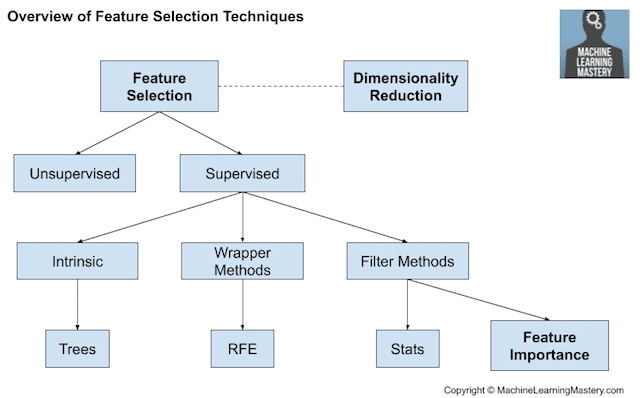

In [29]:
from IPython.display import display, Image
display(Image(filename='feature-selection-techniques.jpg'))

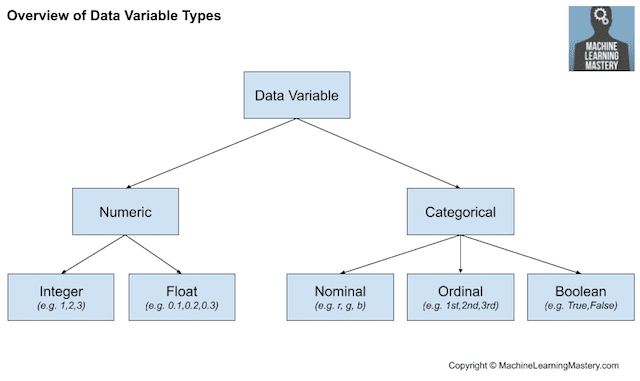

In [30]:
display(Image(filename='data-variable-types.jpg'))

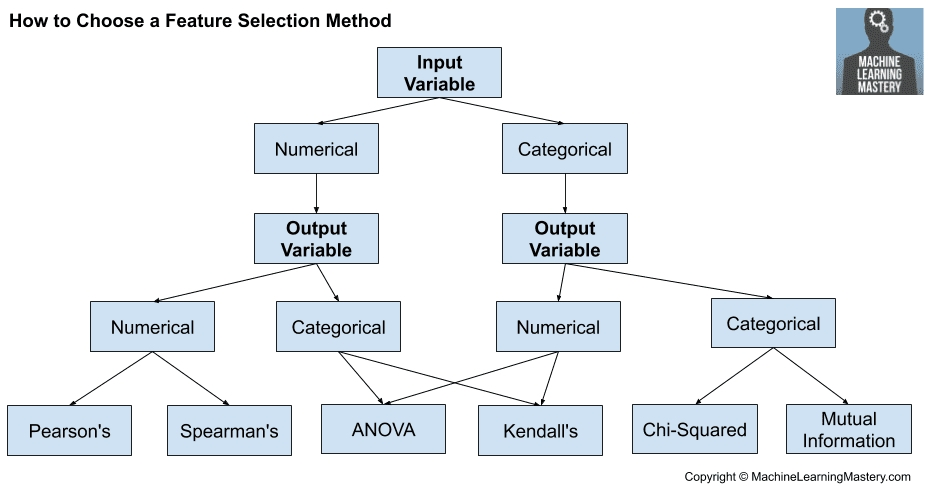

In [31]:
display(Image(filename='how-to-choose.jpg'))

## Applying Filter Methods

In [32]:
# Zero Variance

featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
X_train = X_train.drop(columns = featuresWithZeroVariance)
X_test = X_test.drop(columns = featuresWithZeroVariance)
print(X_train.shape)
print(X_test.shape)
featuresWithZeroVariance

(593, 394)
(105, 394)


['subject_BPT',
 'subject_College',
 'subject_Criminology',
 'subject_Environment Management',
 'subject_Environmental science and management ',
 'subject_Honours ',
 'subject_Not admitted yet',
 'wakeup_00:09:00',
 'wakeup_04:20:00',
 'wakeup_07:15:00',
 'wakeup_10:20:00',
 'wakeup_10:45:00',
 'wakeup_11:38:00',
 'wakeup_13:30:00',
 'wakeup_21:00:00',
 'breakfast_07:45:00',
 'breakfast_14:15:00',
 'breakfast_22:00:00',
 'lunch_06:00:00',
 'lunch_14:15:00',
 'lunch_15:01:00',
 'lunch_16:15:00',
 'lunch_17:30:00',
 'dinner_08:15:00',
 'dinner_10:15:00',
 'dinner_10:59:00',
 'dinner_23:08:00',
 'sleep_01:15:00',
 'sleep_02:15:00',
 'sleep_04:50:00',
 'sleep_09:00:00',
 'sleep_16:00:00']

In [33]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
# sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1)

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [34]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = correlation(X_train, 0.87) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

55
{'dinner_01:20:00', 'lunch_17:25:00', 'breakfast_12:11:00', 'sleep_01:20:00', 'dinner_11:50:00', 'dinner_23:09:00', 'lunch_18:30:00', 'dinner_07:07:00', 'breakfast_10:50:00', 'sleep_11:55:00', 'lunch_01:45:00', 'lunch_16:20:00', 'sleep_04:45:00', 'lunch_22:00:00', 'sleep_22:30:00', 'dinner_21:47:00', 'sleep_20:08:00', 'sleep_02:02:00', 'dinner_22:38:00', 'breakfast_00:11:00', 'lunch_02:02:00', 'lunch_16:45:00', 'breakfast_14:50:00', 'sleep_02:11:00', 'dinner_19:07:00', 'breakfast_13:07:00', 'lunch_12:04:00', 'sleep_03:03:00', 'breakfast_17:30:00', 'lunch_16:04:00', 'sleep_00:05:00', 'dinner_00:44:00', 'living_Without family', 'breakfast_15:07:00', 'dinner_12:10:00', 'relationship_Single', 'lunch_14:11:00', 'sleep_03:58:00', 'dinner_12:08:00', 'sleep_06:23:00', 'wakeup_04:50:00', 'sleep_11:20:00', 'lunch_15:07:00', 'gender_Male', 'lunch_17:03:00', 'dinner_00:15:00', 'breakfast_04:45:00', 'dinner_22:11:00', 'breakfast_12:15:00', 'sleep_00:20:00', 'lunch_15:12:00', 'sleep_07:00:00', 'l

In [36]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

print(X_train.shape)
print(X_test.shape)

(593, 339)
(105, 339)


## Applying Intrinsic Methods

                                        Features  Importances
218                               lunch_02:15:00     0.000005
144                              wakeup_11:20:00     0.000008
38   subject_Biochemistry and Molecular Biology      0.000011
224                               lunch_04:30:00     0.000014
146                              wakeup_11:50:00     0.000015
..                                           ...          ...
20                                    mood_Happy     0.028872
14                                   study_hours     0.030098
17                               movies_per_week     0.030211
6                                        friends     0.035197
1                                       semester     0.037659

[339 rows x 2 columns]


<AxesSubplot:>

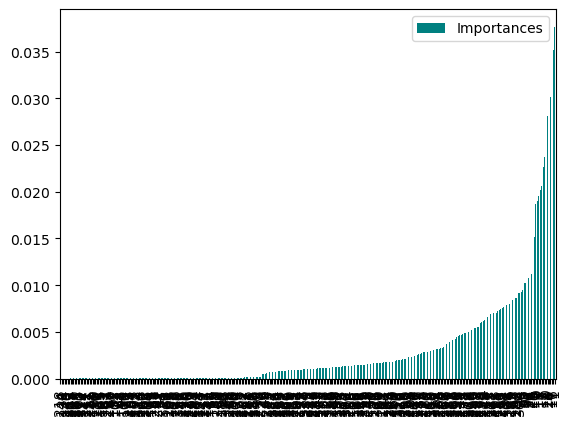

In [37]:
# Random Forest Importrance

from sklearn.ensemble import RandomForestClassifier
import matplotlib

model = RandomForestClassifier(n_estimators=3400)

model.fit(X_train, y_train)

importances = model.feature_importances_

final_df = pd.DataFrame({
    "Features": X_train.columns,
    "Importances": importances
})

final_df = final_df.sort_values('Importances')
           
print(final_df)
final_df.head()

matplotlib.rc_file_defaults()
final_df.plot.bar(color = 'teal')

In [38]:
final_features = []
for index, row in final_df.iterrows():
    if row['Importances'] >= 0.01:
        print(row['Features'])
        final_features.append(row['Features'])
X_train = X_train[final_features]
X_test = X_test[final_features]

meditation
personality_Ambivert
personality_Introvert
mood_Lost
subject_Engineering
gender_Female
mood_Tensed
sports
social_events
pray
video_games
hangout
exercise
phone_hours
sibilings
age
music_hours
mood_Happy
study_hours
movies_per_week
friends
semester


# Model Creation and Evaluation(Predict Specific Category)

In [39]:
# importing classifiers

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics

In [40]:
# searcing for best parameters for DecisionTreeClassifier uisng GridSearchCV

pca = PCA()
std_slc = StandardScaler()
dec_tree = DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

n_components = list(range(1, X.shape[1] + 1, 1))
criterion = ['gini', 'entropy']
max_depth = np.arange(2, 12, 1)

parameters = dict(pca__n_components=n_components,
                  dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth)

param_grid = {
    'n_components': list(range(1, X.shape[1] + 1, 1)),
    'criterion': ['gini', 'entropy'],
    "max_depth": np.arange(2, 12, 1)
}

grid_search = GridSearchCV(pipe, parameters)
grid_search.fit(X_train, y_train)
cross_val_df = pd.DataFrame(grid_search.cv_results_)
print(grid_search.best_score_)
print(grid_search.best_params_)
cross_val_df.head()

0.726833784361202
{'dec_tree__criterion': 'gini', 'dec_tree__max_depth': 2, 'pca__n_components': 1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dec_tree__criterion,param_dec_tree__max_depth,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008702,0.008155,0.001800,2.448183e-04,gini,2,1,"{'dec_tree__criterion': 'gini', 'dec_tree__max...",0.722689,0.722689,0.722689,0.745763,0.720339,0.726834,0.009508,1
1,0.005401,0.000374,0.001600,2.004149e-04,gini,2,2,"{'dec_tree__criterion': 'gini', 'dec_tree__max...",0.722689,0.689076,0.722689,0.737288,0.728814,0.720111,0.016415,31
2,0.005501,0.000316,0.002000,3.154513e-04,gini,2,3,"{'dec_tree__criterion': 'gini', 'dec_tree__max...",0.722689,0.680672,0.722689,0.711864,0.703390,0.708261,0.015583,62
3,0.005801,0.000245,0.002000,1.784161e-07,gini,2,4,"{'dec_tree__criterion': 'gini', 'dec_tree__max...",0.722689,0.680672,0.722689,0.720339,0.737288,0.716736,0.019010,43
4,0.005301,0.000245,0.001701,2.451067e-04,gini,2,5,"{'dec_tree__criterion': 'gini', 'dec_tree__max...",0.722689,0.680672,0.722689,0.720339,0.737288,0.716736,0.019010,43


In [41]:
# searcing for best parameters for KNeighborsClassifier uisng GridSearchCV

pca = PCA()
std_slc = StandardScaler()
dec_tree = KNeighborsClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

n_components = list(range(1, X.shape[1] + 1, 1))
criterion = ['gini', 'entropy']
max_depth = np.arange(2, 12, 1)

parameters = dict(pca__n_components=n_components,
                  dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth)

param_grid = { 
    'n_neighbors' : list(range(1, 20, 1)),
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}

clf = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=param_grid, cv = 5)
clf.fit(X_train, y_train)
print(clf.best_score_)
clf.best_params_

0.7268195413758722


{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

In [42]:
# ZeroR classifier

clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Train Accuracy:  0.7251264755480608
Test Accuracy:  0.7333333333333333
              precision    recall  f1-score   support

    Moderate       0.73      1.00      0.85        77
        None       0.00      0.00      0.00        16
      Severe       0.00      0.00      0.00        12

    accuracy                           0.73       105
   macro avg       0.24      0.33      0.28       105
weighted avg       0.54      0.73      0.62       105



2
Depth =  2 , Training Accuracy =  0.7284991568296796 , Test Accuracy =  0.7619047619047619 , Diff =  3.340560507508228  %
3
Depth =  3 , Training Accuracy =  0.7419898819561551 , Test Accuracy =  0.7523809523809524 , Diff =  1.0391070424797255  %
4
Depth =  4 , Training Accuracy =  0.7521079258010118 , Test Accuracy =  0.7428571428571429 , Diff =  0.925078294386894  %
Depth =  5 , Training Accuracy =  0.790893760539629 , Test Accuracy =  0.7714285714285715 , Diff =  1.9465189111057546  %
Depth =  6 , Training Accuracy =  0.8279932546374368 , Test Accuracy =  0.7714285714285715 , Diff =  5.656468320886532  %
Depth =  7 , Training Accuracy =  0.8600337268128162 , Test Accuracy =  0.7428571428571429 , Diff =  11.717658395567332  %
Depth =  8 , Training Accuracy =  0.8954468802698144 , Test Accuracy =  0.7142857142857143 , Diff =  18.116116598410017  %
Depth =  9 , Training Accuracy =  0.9342327150084317 , Test Accuracy =  0.7333333333333333 , Diff =  20.089938167509846  %
Depth =  10 , 

Text(0, 0.5, 'Accuracy')

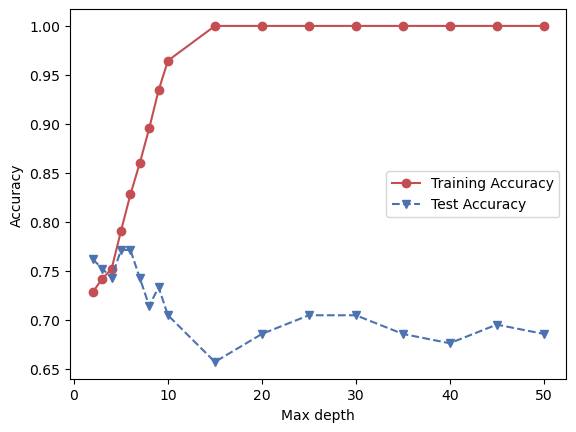

In [43]:
# Decision Tree

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
difference = 100.0
best_depth = 0

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    curr_difference = np.abs(trainAcc[index]-testAcc[index]) * 100.00
    if curr_difference < difference:
        difference = curr_difference
        print(depth)
        best_depth = depth
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index],
          ", Diff = ", curr_difference, " %")
    index += 1

print('\n\n')
print('Best depth is ', best_depth)
clf = DecisionTreeClassifier(max_depth=best_depth)
clf = clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)
print(classification_report(y_test, y_predTest))
#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [44]:
skfold = StratifiedKFold(n_splits=2)
clf = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(clf, X, y, cv = skfold)
print(np.mean(results))

0.7263610315186246


K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.580952380952381 , Difference =  41.9047619047619 %
K =  5 , Training Accuracy =  0.7706576728499157  Test Accuracy =  0.7238095238095238 , Difference =  4.684814904039191 %
K =  10 , Training Accuracy =  0.7217537942664418  Test Accuracy =  0.7428571428571429 , Difference =  2.1103348590701065 %
K =  15 , Training Accuracy =  0.7217537942664418  Test Accuracy =  0.7428571428571429 , Difference =  2.1103348590701065 %
K =  20 , Training Accuracy =  0.7268128161888702  Test Accuracy =  0.7333333333333333 , Difference =  0.6520517144463112 %
K =  25 , Training Accuracy =  0.7268128161888702  Test Accuracy =  0.7333333333333333 , Difference =  0.6520517144463112 %
K =  30 , Training Accuracy =  0.7251264755480608  Test Accuracy =  0.7333333333333333 , Difference =  0.8206857785272526 %


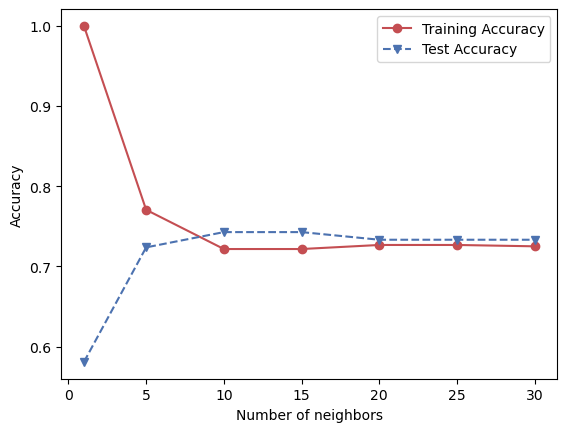

In [45]:
# KNN with Euclidean Distance Metric

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index],
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.580952380952381 , Difference =  41.9047619047619 %
K =  5 , Training Accuracy =  0.7807757166947723  Test Accuracy =  0.6952380952380952 , Difference =  8.55376214566771 %
K =  10 , Training Accuracy =  0.7352445193929174  Test Accuracy =  0.7523809523809524 , Difference =  1.7136432988035022 %
K =  15 , Training Accuracy =  0.7251264755480608  Test Accuracy =  0.7428571428571429 , Difference =  1.7730667309082127 %
K =  20 , Training Accuracy =  0.7251264755480608  Test Accuracy =  0.7428571428571429 , Difference =  1.7730667309082127 %
K =  25 , Training Accuracy =  0.7251264755480608  Test Accuracy =  0.7333333333333333 , Difference =  0.8206857785272526 %
K =  30 , Training Accuracy =  0.7251264755480608  Test Accuracy =  0.7333333333333333 , Difference =  0.8206857785272526 %


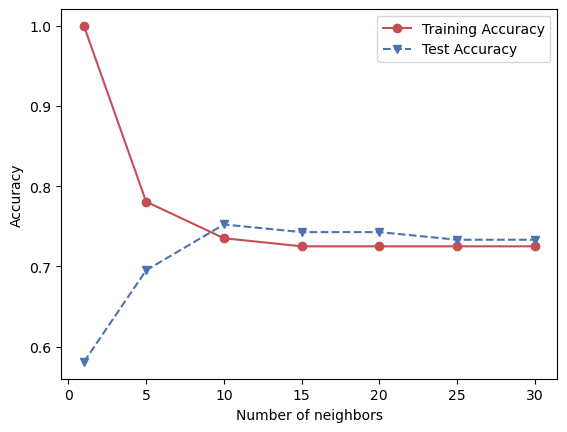

In [46]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index],
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [47]:
# Logistic Regression

clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Logistic Regression with no regularization
Train Accuracy:  0.7436762225969646
Test Accuracy:  0.7238095238095238

Logistic Regression with L2 regularization
Train Accuracy:  0.7386172006745363
Test Accuracy:  0.7428571428571429
              precision    recall  f1-score   support

    Moderate       0.75      0.97      0.85        77
        None       0.60      0.19      0.29        16
      Severe       0.00      0.00      0.00        12

    accuracy                           0.74       105
   macro avg       0.45      0.39      0.38       105
weighted avg       0.64      0.74      0.67       105



2
Depth =  2 , Training Accuracy =  0.7251264755480608 , Test Accuracy =  0.7333333333333333 , Diff =  0.8206857785272526  %
Depth =  3 , Training Accuracy =  0.7251264755480608 , Test Accuracy =  0.7333333333333333 , Diff =  0.8206857785272526  %
Depth =  4 , Training Accuracy =  0.7251264755480608 , Test Accuracy =  0.7333333333333333 , Diff =  0.8206857785272526  %
5
Depth =  5 , Training Accuracy =  0.7352445193929174 , Test Accuracy =  0.7333333333333333 , Diff =  0.1911186059584069  %
Depth =  6 , Training Accuracy =  0.7588532883642496 , Test Accuracy =  0.7333333333333333 , Diff =  2.551995503091631  %
Depth =  7 , Training Accuracy =  0.8010118043844857 , Test Accuracy =  0.7333333333333333 , Diff =  6.767847105115243  %
Depth =  8 , Training Accuracy =  0.8566610455311973 , Test Accuracy =  0.7333333333333333 , Diff =  12.332771219786398  %
Depth =  9 , Training Accuracy =  0.9072512647554806 , Test Accuracy =  0.7428571428571429 , Diff =  16.439412189833767  %
Depth =  10 , 

Text(0, 0.5, 'Accuracy')

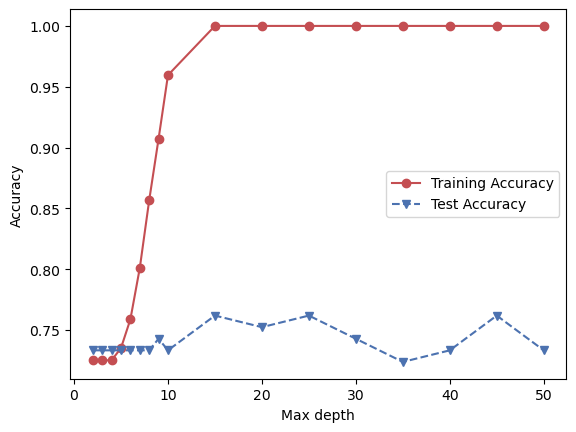

In [48]:
# Random Forest Classifier

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
difference = 100.0
best_depth = 0

index = 0
for depth in maxdepths:
    clf = RandomForestClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    curr_difference = np.abs(trainAcc[index]-testAcc[index]) * 100.00
    if curr_difference < difference:
        difference = curr_difference
        print(depth)
        best_depth = depth
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index],
          ", Diff = ", curr_difference, " %")
    index += 1

print('\n\n')
print('Best depth is ', best_depth)
clf = RandomForestClassifier(max_depth=best_depth)
clf = clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)
print(classification_report(y_test, y_predTest))
#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [49]:
# Perception

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Train Accuracy:  0.7335581787521079
Test Accuracy:  0.7142857142857143
              precision    recall  f1-score   support

    Moderate       0.73      0.97      0.83        77
        None       0.00      0.00      0.00        16
      Severe       0.00      0.00      0.00        12

    accuracy                           0.71       105
   macro avg       0.24      0.32      0.28       105
weighted avg       0.53      0.71      0.61       105



In [50]:
# Multinomial Naive Bayes

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Train Accuracy:  0.718381112984823
Test Accuracy:  0.7047619047619048
              precision    recall  f1-score   support

    Moderate       0.73      0.96      0.83        77
        None       0.00      0.00      0.00        16
      Severe       0.00      0.00      0.00        12

    accuracy                           0.70       105
   macro avg       0.24      0.32      0.28       105
weighted avg       0.53      0.70      0.61       105



In [51]:
# SVC

clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Train Accuracy:  0.7251264755480608
Test Accuracy:  0.7333333333333333
              precision    recall  f1-score   support

    Moderate       0.73      1.00      0.85        77
        None       0.00      0.00      0.00        16
      Severe       0.00      0.00      0.00        12

    accuracy                           0.73       105
   macro avg       0.24      0.33      0.28       105
weighted avg       0.54      0.73      0.62       105



In [52]:
# for the SVC classifier

print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[77  0  0]
 [16  0  0]
 [12  0  0]]

Classification Report
              precision    recall  f1-score   support

    Moderate      0.733     1.000     0.846        77
        None      0.000     0.000     0.000        16
      Severe      0.000     0.000     0.000        12

    accuracy                          0.733       105
   macro avg      0.244     0.333     0.282       105
weighted avg      0.538     0.733     0.621       105



In [53]:
# plot roc curve

clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test)

ValueError: SVC should be a binary classifier